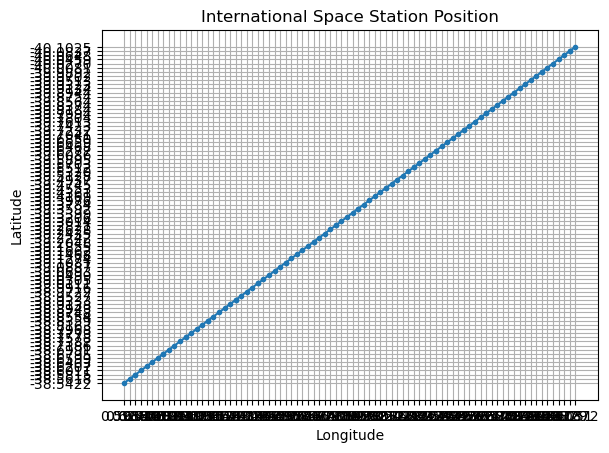

In [27]:
# made with assistance of ChatGPT, specifically:
# how to ping it over a specified time interval
# how to convert the webscraped data from the api into a workable dataframe

import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time

url = "http://api.open-notify.org/iss-now.json"

interval = 10 #basically 10 second intervals
count = 0 #starting counter, we want this to reach 100 then break

pos_data = []

while count < 100:
    api_ping = requests.get(url)
    
    if api_ping.status_code == 200:
        iss_tracker = api_ping.json()
        long = iss_tracker['iss_position']['longitude']
        lat = iss_tracker['iss_position']['latitude']
        time_s = iss_tracker['timestamp']
        
        pos_data.append({'Time':time_s, 'Longitude':long, 'Latitude':lat})
        count += 1 
    
    else:
        print('error')
        
time.sleep(interval)
pos_table = pd.DataFrame(pos_data)

plt.plot(pos_table['Longitude'], pos_table['Latitude'], marker = '.')
plt.title('International Space Station Position')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()